## Primera red neuronal

In [2]:
import numpy as np
import pandas as pd

In [3]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
diabetes_train = pd.read_csv('/content/diabetes_train.csv')
diabetes_train

In [ ]:
x = diabetes_train.iloc[ : , 0:8].values
x

In [ ]:
y = diabetes_train.iloc[ : , -1].values
y

## Definir la estructura de la Red Neuronal

In [23]:
model = Sequential()

In [24]:
model.add(Dense(12, input_dim=8, activation='relu'))

In [25]:
model.add(Dense(8, activation='relu'))

In [27]:
model.add(Dense(1, activation='sigmoid'))

## Modelo de compilacion Red

In [26]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

## Entrenamiento de una red neuronal

In [39]:
historial = model.fit(x, y, epochs=1000, batch_size=10)

Epoch 1/1000
75/75 [==============================] - 0s 4ms/step - loss: 0.5226 - accuracy: 0.7617
Epoch 2/1000
75/75 [==============================] - 0s 4ms/step - loss: 0.5151 - accuracy: 0.7617
Epoch 3/1000
75/75 [==============================] - 0s 3ms/step - loss: 0.5174 - accuracy: 0.7550
Epoch 4/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.5137 - accuracy: 0.7604
Epoch 5/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.5124 - accuracy: 0.7631
Epoch 6/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.5082 - accuracy: 0.7697
Epoch 7/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.5096 - accuracy: 0.7483
Epoch 8/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.5093 - accuracy: 0.7671
Epoch 9/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.5165 - accuracy: 0.7523
Epoch 10/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.5328 - accuracy: 0.7617

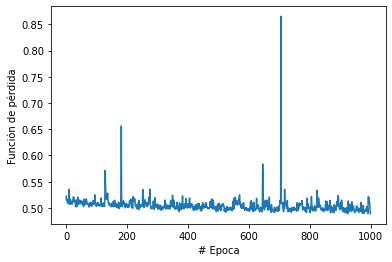

In [41]:
import matplotlib.pyplot as plt

plt.xlabel("# Epoca")
plt.ylabel("Función de pérdida")

plt.plot(historial.history['loss'])

### Test

In [ ]:
diabetes_test = pd.read_csv('/content/diabetes_test.csv')
diabetes_test

In [ ]:
x_test = diabetes_test.iloc [ : , 0:8].values
x_test

In [50]:
y_test  = diabetes_test.iloc[ : , -1].values
y_test

array([0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0])

In [51]:
model.evaluate (x_test, y_test)

1/1 [==============================] - 0s 177ms/step - loss: 0.4632 - accuracy: 0.8571


[0.4632490277290344, 0.8571428656578064]

In [52]:
y_pred = model.predict(x_test)
np.round(y_pred)

1/1 [==============================] - 0s 172ms/step


array([[0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [58]:
resultados = pd.DataFrame(np.round(y_pred), columns=['Predicción'])
resultados['Real'] = pd.Series(y_test)
resultados

,Predicción,Real
0,0.0,0
1,1.0,1
2,0.0,1
3,1.0,1
4,0.0,0
5,0.0,0
6,1.0,1
7,1.0,1
8,1.0,1
9,0.0,0


In [63]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [64]:
matrix = confusion_matrix(resultados['Real'],resultados['Predicción'])

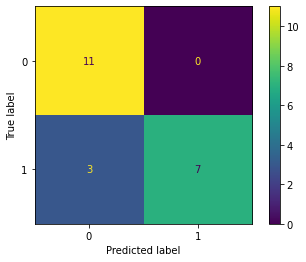

In [66]:
disp = ConfusionMatrixDisplay(matrix)
disp.plot()